In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def calcular_modelo(w,b,x):
    return w*x+b

In [3]:
def calcular_error(y,y_):
    N=y.shape[0]
    error=np.sum((y-y_)**2)/2
    return error

In [4]:
def gradiente_descendente(w_,b_,alpha,x,y):
    N=x.shape[0]
    dw = -(2/N)*np.sum(x*(y-(w_*x+b_)))
    db = -(2/N)*np.sum(y-(w_*x+b_))
    w= w_-alpha*dw
    b= b_-alpha*db

    return w,b

In [6]:
datos = pd.read_csv('dataset.csv', sep=',', skiprows=32, usecols=[2,3])
print(datos)

    Age  Systolic blood pressure
0    39                      144
1    45                      138
2    47                      145
3    65                      162
4    46                      142
5    67                      170
6    42                      124
7    67                      158
8    56                      154
9    64                      162
10   56                      150
11   59                      140
12   34                      110
13   42                      128
14   48                      130
15   45                      135
16   17                      114
17   20                      116
18   19                      124
19   36                      136
20   50                      142
21   39                      120
22   21                      120
23   44                      160
24   53                      158
25   63                      144
26   29                      130
27   25                      125
28   69                      175


Text(0, 0.5, 'Presion  sistolica (mm de mercurio)')

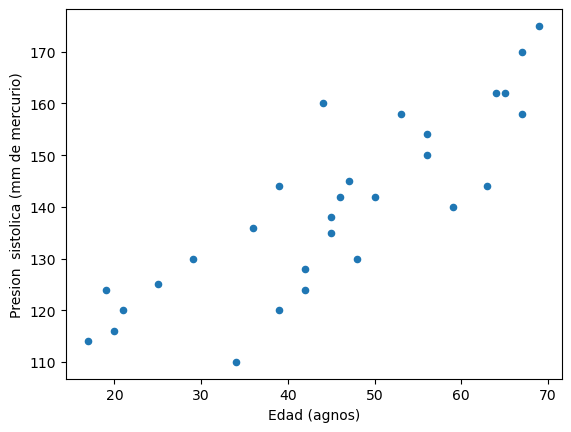

In [7]:
datos.plot.scatter(x='Age', y='Systolic blood pressure')
plt.xlabel('Edad (agnos)')
plt.ylabel('Presion  sistolica (mm de mercurio)')


In [8]:
x=datos['Age'].values
y=datos['Systolic blood pressure'].values


In [12]:
np.random.seed(2)
w = np.random.randn(1)[0]
b = np.random.randn(1)[0]

alpha = 0.0004
nits= 40000


In [14]:
error=np.zeros((nits,1))
for i in range(nits):
    [w,b]= gradiente_descendente(w,b,alpha,x,y)
    y_= calcular_modelo(w,b,x)

    error[i] = calcular_error(y,y_)

    if (i+1)%1000==0:
        print('Epoch {}'.format(i+1))
        print('     w: {:.1f}'.format(w), 'b: {:.1f}'.format(b))
        print('     error: {}'.format(error[i]))
        print('==============================')

Epoch 1000
     w: 1.0 b: 93.8
     error: [1250.87900163]
Epoch 2000
     w: 1.0 b: 94.0
     error: [1248.41277216]
Epoch 3000
     w: 1.0 b: 94.3
     error: [1246.3218598]
Epoch 4000
     w: 1.0 b: 94.5
     error: [1244.54914784]
Epoch 5000
     w: 1.0 b: 94.7
     error: [1243.04621173]
Epoch 6000
     w: 1.0 b: 94.9
     error: [1241.77199628]
Epoch 7000
     w: 1.0 b: 95.1
     error: [1240.6916942]
Epoch 8000
     w: 1.0 b: 95.2
     error: [1239.77579526]
Epoch 9000
     w: 1.0 b: 95.4
     error: [1238.99928017]
Epoch 10000
     w: 1.0 b: 95.5
     error: [1238.34093713]
Epoch 11000
     w: 1.0 b: 95.6
     error: [1237.78278242]
Epoch 12000
     w: 1.0 b: 95.7
     error: [1237.30956913]
Epoch 13000
     w: 1.0 b: 95.9
     error: [1236.90837064]
Epoch 14000
     w: 1.0 b: 96.0
     error: [1236.56822757]
Epoch 15000
     w: 1.0 b: 96.0
     error: [1236.27984834]
Epoch 16000
     w: 1.0 b: 96.1
     error: [1236.0353554]
Epoch 17000
     w: 1.0 b: 96.2
     error: [1235.82

Text(0, 0.5, 'y')

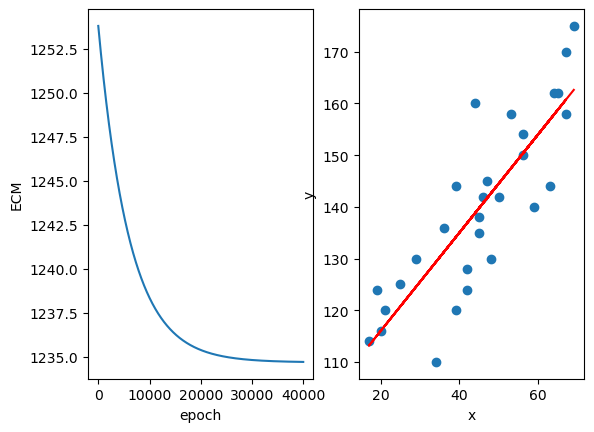

In [16]:
plt.subplot(1,2,1)
plt.plot(range(nits),error)
plt.xlabel('epoch')
plt.ylabel('ECM')

y_regr= calcular_modelo(w,b,x)
plt.subplot(1,2,2)
plt.scatter(x,y)
plt.plot(x,y_regr,'r')
plt.xlabel('x')
plt.ylabel('y')


In [17]:
edad=90
presion= calcular_modelo(w,b,edad)
print('A los {}'.format(edad), ' agnos se tendra una presion sanguinea de {:.1f}'.format(presion))

A los 90  agnos se tendra una presion sanguinea de 182.6
